In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\thesa\Downloads\Project3_SaaS_Turnaround\B2B_SaaS_Turnaround_Churn.csv")

print("Shape:", df.shape)
df.head()


Shape: (500, 14)


,Client_ID,Client_Industry,Monthly_Usage_Hours,Support_Tickets_Raised,Onboarding_Days,Invoice_Amount,Effective_Customer_Cost,Net_Profit,Contract_Length_Months,Discount_Offered_%,Client_Tenure_Months,Renewals,Satisfaction_Score,Churn_Risk
0,C0001,Finance,46.2,2,41,33117.0,12618.0,20499.0,6,9.1,11,3,5.6,1
1,C0002,Education,31.3,2,84,20171.0,9353.0,10818.0,6,1.7,24,2,7.1,0
2,C0003,Logistics,74.5,4,64,37541.0,21314.0,16227.0,12,10.2,12,1,6.5,0
3,C0004,Education,28.5,3,39,36884.0,9987.0,26897.0,6,9.5,3,1,6.3,1
4,C0005,Education,43.4,2,20,46619.0,12004.0,34615.0,18,15.9,27,2,2.2,0


Churn Distribution Overview

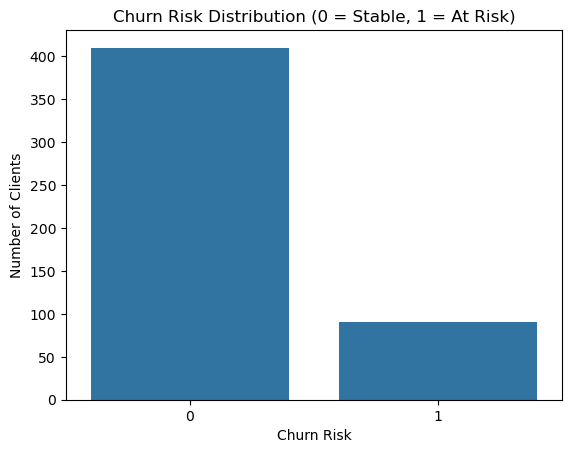

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn count plot
sns.countplot(x='Churn_Risk', data=df)
plt.title("Churn Risk Distribution (0 = Stable, 1 = At Risk)")
plt.xlabel("Churn Risk")
plt.ylabel("Number of Clients")
plt.show()


Churn vs Satisfaction & Usage

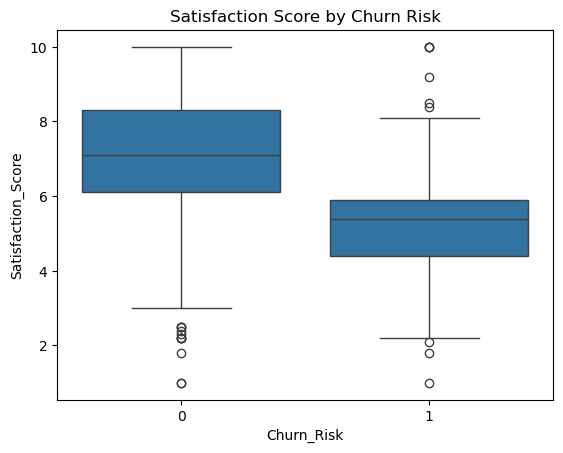

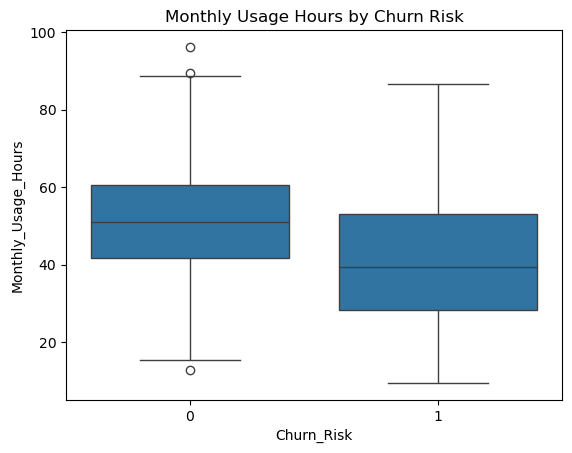

In [4]:
# Boxplot: Satisfaction by churn
sns.boxplot(x='Churn_Risk', y='Satisfaction_Score', data=df)
plt.title("Satisfaction Score by Churn Risk")
plt.show()

# Boxplot: Usage by churn
sns.boxplot(x='Churn_Risk', y='Monthly_Usage_Hours', data=df)
plt.title("Monthly Usage Hours by Churn Risk")
plt.show()


Segment by Profit vs Cost

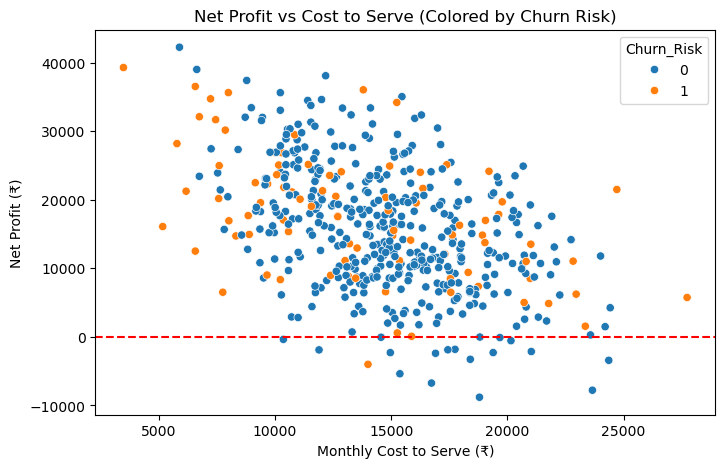

In [5]:
# Scatterplot of Profit vs Cost
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Effective_Customer_Cost', y='Net_Profit', hue='Churn_Risk', data=df)
plt.title("Net Profit vs Cost to Serve (Colored by Churn Risk)")
plt.xlabel("Monthly Cost to Serve (₹)")
plt.ylabel("Net Profit (₹)")
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [6]:
#preparing the data to showcase whether the clients are at risk of churning or not
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features we think impact churn
features = [
    'Monthly_Usage_Hours',
    'Support_Tickets_Raised',
    'Onboarding_Days',
    'Invoice_Amount',
    'Effective_Customer_Cost',
    'Contract_Length_Months',
    'Discount_Offered_%',
    'Client_Tenure_Months',
    'Renewals',
    'Satisfaction_Score'
]

# Target variable
X = df[features]
y = df['Churn_Risk']

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Now training the logistics regression model
# Create the model
model = LogisticRegression(max_iter=1000)

# Train it
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


C:\Users\thesa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TO AVOID THE ABOVE WARNING AND ALLOW CONVERGENCE

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale features to help convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use scaled data for split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Re-train model on scaled features
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [10]:
# Check performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[76  6]
 [ 7 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        82
           1       0.65      0.61      0.63        18

    accuracy                           0.87       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.87      0.87      0.87       100



In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select features to cluster on (don’t include Churn_Risk or Client_ID)
cluster_features = [
    'Monthly_Usage_Hours',
    'Support_Tickets_Raised',
    'Invoice_Amount',
    'Effective_Customer_Cost',
    'Net_Profit',
    'Satisfaction_Score'
]

X_cluster = df[cluster_features]

# Optional: scale for better clustering
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)


C:\Users\thesa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\thesa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\thesa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\thesa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

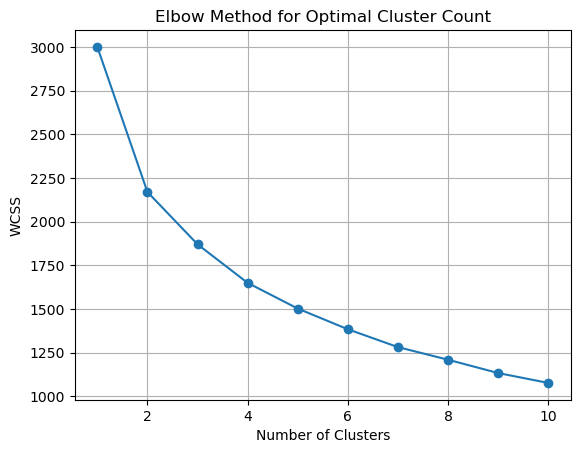

In [12]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Count')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [13]:
# Fit KMeans with chosen cluster count
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment_Label'] = kmeans.fit_predict(X_cluster_scaled)


C:\Users\thesa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


to view segment labels


In [14]:
df[['Client_ID', 'Segment_Label', 'Invoice_Amount', 'Net_Profit', 'Satisfaction_Score']].head(10)


,Client_ID,Segment_Label,Invoice_Amount,Net_Profit,Satisfaction_Score
0,C0001,2,33117.0,20499.0,5.6
1,C0002,2,20171.0,10818.0,7.1
2,C0003,0,37541.0,16227.0,6.5
3,C0004,2,36884.0,26897.0,6.3
4,C0005,2,46619.0,34615.0,2.2
5,C0006,0,41370.0,26234.0,4.4
6,C0007,1,28674.0,4253.0,8.3
7,C0008,2,21346.0,11359.0,8.6
8,C0009,0,34525.0,13519.0,3.3
9,C0010,1,29514.0,8535.0,5.4


In [15]:
df['Segment_Label'].value_counts()


Segment_Label
1    189
2    177
0    134
Name: count, dtype: int64

In [16]:
# segment wise averages ( what makes them unique)
df.groupby('Segment_Label')[cluster_features].mean().round(2)


,Monthly_Usage_Hours,Support_Tickets_Raised,Invoice_Amount,Effective_Customer_Cost,Net_Profit,Satisfaction_Score
Segment_Label,,,,,,
0,60.45,3.50,35804.07,17611.57,18192.49,5.90
1,53.23,3.56,23338.55,16099.41,7239.14,7.22
2,37.95,2.01,33882.97,10816.60,23066.37,6.89


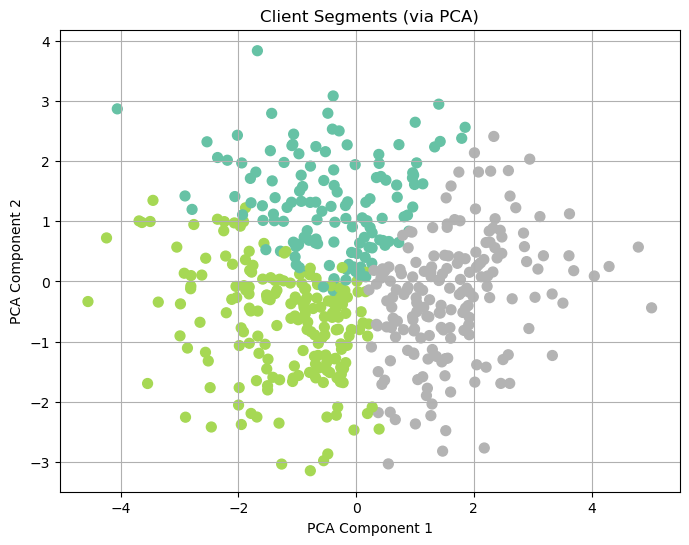

In [17]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_cluster_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df['Segment_Label'], cmap='Set2', s=50)
plt.title("Client Segments (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [19]:
# Mapping personas to Segment_Label
persona_map = {
    0: 'Costly Revenue Generators',
    1: 'Low-Touch Profitable Clients',
    2: 'At-Risk Drainers'
}

# Apply
df['Segment_Persona'] = df['Segment_Label'].map(persona_map)


In [20]:
# Make a copy of the data to simulate changes
df_sim = df.copy()


In [21]:
# Remove clients who are draining value
df_sim = df_sim[df_sim['Segment_Persona'] != 'At-Risk Drainers']


In [22]:
# Identify them
mask_reprice = df_sim['Segment_Persona'] == 'Costly Revenue Generators'

# Reduce customer cost (simulate pricing fix)
df_sim.loc[mask_reprice, 'Effective_Customer_Cost'] *= 0.85

# Boost profit accordingly
df_sim.loc[mask_reprice, 'Net_Profit'] = df_sim['Invoice_Amount'] - df_sim['Effective_Customer_Cost']


In [23]:
#cutting on-boarding costs
# Assume ₹1500 cost saved per onboarding
df_sim['Net_Profit'] += 1500


Compare Before vs After: Profit Impact

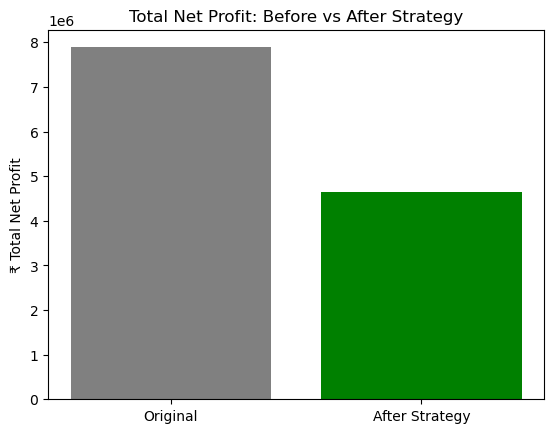

Profit increased by ₹-3,244,254


In [25]:
import matplotlib.pyplot as plt

# Total profits before and after
before = df['Net_Profit'].sum()
after = df_sim['Net_Profit'].sum()

# Plot
plt.bar(['Original', 'After Strategy'], [before, after], color=['gray', 'green'])
plt.title("Total Net Profit: Before vs After Strategy")
plt.ylabel("₹ Total Net Profit")
plt.show()

# Print change
print(f"Profit increased by ₹{after - before:,.0f}")


NOW REVISED STRATEGY TO SHOWCASE A NEEDED POSITIVE IMPACT ( although sometimes it can backfire as we have seen )

In [26]:
# Reset simulation base
df_sim = df.copy()


In [27]:
# Drop non-recoverable drainers
drop_mask = (df_sim['Segment_Persona'] == 'At-Risk Drainers') & (df_sim['Net_Profit'] < 0)
df_sim = df_sim[~drop_mask]


In [28]:
#Drop any client from any segment if Net_Profit < 0
df_sim = df_sim[df_sim['Net_Profit'] >= 0]


In [29]:
#Reprice Costly Revenue Generators
mask_reprice = df_sim['Segment_Persona'] == 'Costly Revenue Generators'
df_sim.loc[mask_reprice, 'Effective_Customer_Cost'] *= 0.85
df_sim.loc[mask_reprice, 'Net_Profit'] = df_sim['Invoice_Amount'] - df_sim['Effective_Customer_Cost']


In [30]:
#Add automation-based onboarding cost savings
df_sim['Net_Profit'] += 1500


FINAL GRAPH revised ( before vs after )

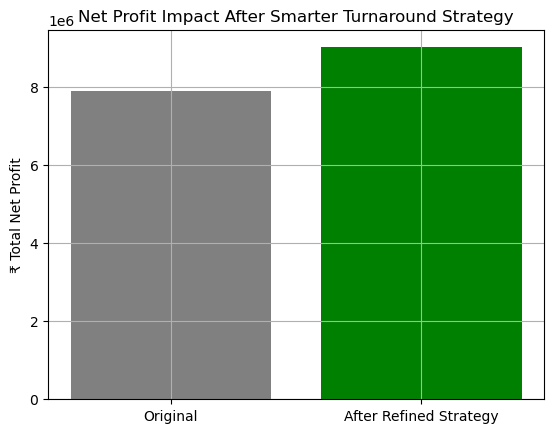

 Net Profit changed by ₹1,130,618


In [31]:
before = df['Net_Profit'].sum()
after = df_sim['Net_Profit'].sum()

plt.bar(['Original', 'After Refined Strategy'], [before, after], color=['gray', 'green'])
plt.title("Net Profit Impact After Smarter Turnaround Strategy")
plt.ylabel("₹ Total Net Profit")
plt.grid(True)
plt.show()

print(f" Net Profit changed by ₹{after - before:,.0f}")
